In [1]:
import requests
import json
from config import api_key
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random
from pprint import pprint
import csv
from random import uniform

In [2]:
cityidlist = []
with open('city.list.json', 'r', encoding='utf8') as ct:
    ct_dict = json.load(ct)
while len(cityidlist) < 3000:
    lat, lon = uniform(-180,180), uniform(-90, 90)
    for x in ct_dict:
        if int(round(lat)) == int(round(x['coord']['lat'])) & int(round(lon)) == int(round(x['coord']['lon'])):
            cityidlist.append(x['id'])
            if len(cityidlist) > 3000:
                break
print(len(cityidlist))

3001


In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
response_list = []
unit = 'Imperial'
for x in cityidlist:
    base_url = url + "id=" + str(x) + "&appid=" + api_key + "&units=" + unit
    response = requests.get(base_url).json()
    response_list.append(response)

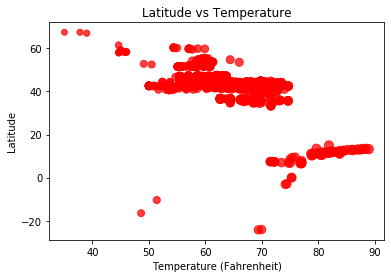

-0.4993


In [4]:
# Temperature (F) vs. Latitude
temp = []
latitude = []
for x in response_list:
    temp.append(x['main']['temp'])
    latitude.append(x['coord']['lat'])
plt.scatter(temp, latitude, facecolor='red', s=temp, alpha=0.75)
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Latitude')
plt.title('Latitude vs Temperature')
plt.savefig('output/scatter_lat_vs_temperature')
plt.show() # This code will display scatter plot of temperature vs latitude for the current weather.
            # According to the plot, it seems like there might be an association between temperature and latitude, as
            # there are many dots displayed at certain coordinates.
        
print(round(st.pearsonr(temp, latitude)[0],4)) # This code will calculate correlation coefficient for latitude and temperature.
                                              # The coefficient was -0.4993, which means that there might be a moderate weak negative
                                             # correlation between latitude and Temperature. 
                                            # However, since it is very close to 0 and the samples are concentrated with
                                            # high latitudes than the lower latitudes, it may not represent the actual correlation.
                                           # Therefore, further analysis is needed to identify the relationship. 

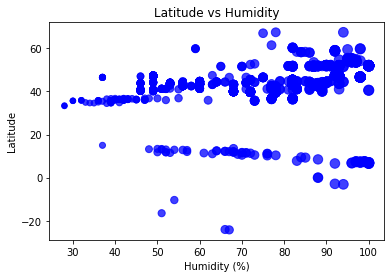

0.1656


In [5]:
# Humidity (%) vs. Latitude
humidity = []
latitude = []
for x in response_list:
    humidity.append(x['main']['humidity'])
    latitude.append(x['coord']['lat'])
plt.scatter(humidity, latitude, facecolor='blue', s=humidity, alpha=0.75)
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Humidity')
plt.savefig('output/scatter_lat_vs_humidity')
plt.show() # This code will display scatter plot of humidity vs latitude for the current weather.
            # According to the plot, it seems like there might be an association between humidity and latitude, as
            # there are many dots concentrated at certain coordinates.

print(round(st.pearsonr(humidity, latitude)[0],4)) # This code will yeild correlation coefficient with four decimal digits.
                                                  # Since the coefficient is 0.1656, it may mean that the correlation is moderately
                                                 # positive.

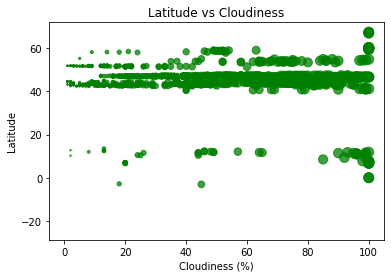

0.1075


In [6]:
# Cloudiness (%) vs. Latitude

cloudiness = []
latitude = []
for x in response_list:
    cloudiness.append(x['clouds']['all'])
    latitude.append(x['coord']['lat'])   

plt.scatter(cloudiness, latitude, facecolor='green', s=cloudiness, alpha=0.75)
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.title('Latitude vs Cloudiness')
plt.savefig('output/scatter_lat_vs_cloudiness')
plt.show()   # This code will display scatter plot of cloudiness vs latitude for the current weather.
            # According to the plot, it seems like there might be an association between cloudiness and latitude, as
           # there are many dots concentrated at certain coordinates.

print(round(st.pearsonr(cloudiness, latitude)[0],4)) # This code will yeild correlation coefficient with four decimal digits.
                                                    # Since the coefficient is 0.1075, it may mean that the correlation is positive.
                                                   # However, since it is also very close to 0, the correlation is very weak.
                                                  # Thus, further analysis is needed to identify the relationship.

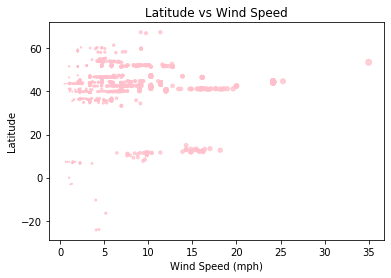

0.0059


In [7]:
# Wind Speed (mph) vs. Latitude
wspeed = []
latitude = []
for x in response_list:
    wspeed.append(x['wind']['speed'])
    latitude.append(x['coord']['lat'])   

plt.scatter(wspeed, latitude, facecolor='pink', s=wspeed, alpha=0.75)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title('Latitude vs Wind Speed')
plt.savefig('output/scatter_lat_vs_wind_speed')
plt.show()   # This code will display scatter plot of wind speed vs latitude for the current weather.
            # According to the plot, it seems like there might be an association between wind speed and latitude, as
           # there are many dots concentrated when the x_axis is low and y_axis is high.
        
print(round(st.pearsonr(wspeed, latitude)[0],4))     # This code will yeild correlation coefficient with four decimal digits.
                                                    # Since the coefficient is 0.0057, it may mean that the correlation is positive.
                                                   # However, since it is also very close to 0, the correlation is very weak.
                                                  # Thus, further analysis is needed to identify the relationship.

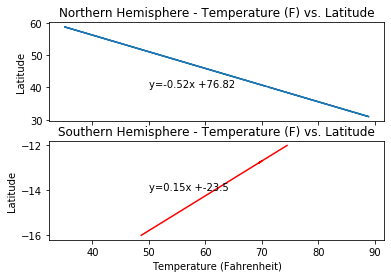

In [9]:
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
n_temp = []
s_temp = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_temp.append(x['main']['temp'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_temp.append(x['main']['temp']) 
        
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_temp, northern_latitude)
nregress = nslope * np.asarray(n_temp) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_temp, southern_latitude)
sregress = sslope * np.asarray(s_temp) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_temp, nregress)
ax1.annotate(nequation, (50, 40), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Temperature (F) vs. Latitude')

ax2.plot(s_temp, sregress, color = 'red')
ax2.annotate(sequation, (50, -14), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Temperature (Fahrenheit)')
ax2.set_title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.savefig('output/NS_temperature_vs_latitude')
plt.show()
# This code will plot linear regression of northern and southern hemisphere's temperature vs latitude in two separate line graphs.
# the positivity or negativity of the slopes of the linear regression equation of each line plots 
# tells us that the line is going up or down. Since the Northern hemisphere's line is negative, the line is going down, which
# means that the temperature is increasing when the latitude is getting lower.
# Southern hemisphere's line is going up since the slope is positive, and therefore the temperature increases when the latitude 
# is increasing.
# Therefore, these line graphs are telling that temperature goes up when the latitude is closer to the  0 latitude.

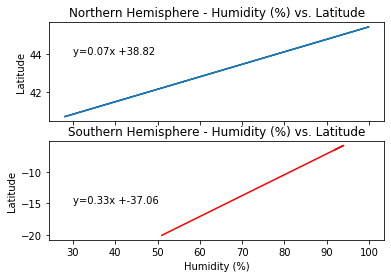

In [13]:
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
n_hum = []
s_hum = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_hum.append(x['main']['humidity'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_hum.append(x['main']['humidity'])  
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_hum, northern_latitude)
nregress = nslope * np.asarray(n_hum) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_hum, southern_latitude)
sregress = sslope * np.asarray(s_hum) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_hum, nregress)
ax1.annotate(nequation, (30, 44), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Humidity (%) vs. Latitude')

ax2.plot(s_hum, sregress, color = 'red')
ax2.annotate(sequation, (30, -15), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Humidity (%)')
ax2.set_title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.savefig('output/NS_humidity_vs_latitude')
plt.show()
# This code will plot linear regression of northern and southern hemisphere's homidity vs latitude in two separate line graphs.
# Since the Northern hemisphere's slope is positive, the humidity increases when the latitude increases.
# Southern hemisphere's slope is also positive, therefore the humidity increases when the latitude is closer to 0.

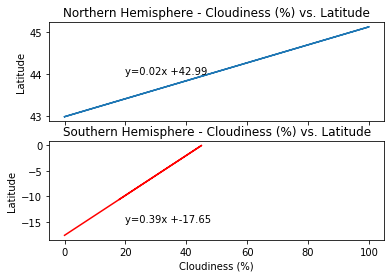

In [15]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
n_cloud = []
s_cloud = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_cloud.append(x['clouds']['all'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_cloud.append(x['clouds']['all'])
        
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_cloud, northern_latitude)
nregress = nslope * np.asarray(n_cloud) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_cloud, southern_latitude)
sregress = sslope * np.asarray(s_cloud) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_cloud, nregress)
ax1.annotate(nequation, (20, 44), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

ax2.plot(s_cloud, sregress, color = 'red')
ax2.annotate(sequation, (20, -15), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Cloudiness (%)')
ax2.set_title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.savefig('output/NS_cloudiness_vs_latitude')
plt.show()

# This code will plot linear regression of northern and southern hemisphere's cloudiness vs latitude in two separate line graphs.
# Since the Northern hemisphere's slope is positive, the cloudiness increases when the latitude increases.
# Southern hemisphere's slope is also positive, and therefore the cloudiness increases when the latitude is closer to 0 latitude.

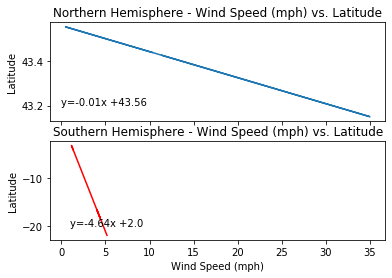

In [17]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude
n_wspd = []
s_wspd = []
northern_latitude = []
southern_latitude = []
for x in response_list:
    if x['coord']['lat'] >= 0:
        northern_latitude.append(x['coord']['lat'])
        n_wspd.append(x['wind']['speed'])
    elif x['coord']['lat'] < 0:
        southern_latitude.append(x['coord']['lat'])
        s_wspd.append(x['wind']['speed']) 
 
(nslope, nintercept, nrvalue, npvalue, nstderror) = st.linregress(n_wspd, northern_latitude)
nregress = nslope * np.asarray(n_wspd) + nintercept
nequation = "y=" + str(round(nslope,2)) + "x +" + str(round(nintercept,2))

(sslope, sintercept, srvalue, spvalue, sstderror) = st.linregress(s_wspd, southern_latitude)
sregress = sslope * np.asarray(s_wspd) + sintercept
sequation = "y=" + str(round(sslope,2)) + "x +" + str(round(sintercept,2))

fig1, (ax1, ax2) = plt.subplots(2, sharex=True)

ax1.plot(n_wspd, nregress)
ax1.annotate(nequation, (0, 43.2), fontsize=10)
ax1.set_ylabel('Latitude')
ax1.set_title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

ax2.plot(s_wspd, sregress, color = 'red')
ax2.annotate(sequation, (1, -20), fontsize=10)
ax2.set_ylabel('Latitude')
ax2.set_xlabel('Wind Speed (mph)')
ax2.set_title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.savefig('output/NS_wspeed_vs_latitude')
plt.show()

# This code will plot linear regression of tnorthern and southern hemisphere's wind speed vs latitude in two separate line graphs.
# Since the Northern hemisphere's slope is negative, the windspeed increases when the latitude is closer to the 0 latitude.
# Southern hemisphere's slope is negative, and therefore the windspeed increases when the latitude is away from 0 latitude.

In [18]:
weather = []
city_name = []
city_id = []
city_latitude = []
city_longitude = []
for x in response_list:
    weather.append(x['weather'])
    city_name.append(x['name'])
    city_id.append(x['id'])
    city_latitude.append(x['coord']['lat'])
    city_longitude.append(x['coord']['lon'])
# print(weather[0])

In [19]:
print(weather[0])
print(city_name[0])
print(city_id[0])

[{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}]
Tonantins
3661894


In [20]:
with open('../VacationPy/log.csv', 'w', newline='', encoding='UTF-8') as logfile:
    thewriter = csv.DictWriter(logfile, ['Weather', 'City Name', 'City ID'])
    thewriter.writeheader()
    rcount = 0
    for row in weather:
        thewriter.writerow({'Weather':weather[rcount],
                           'City Name':city_name[rcount],
                            'City ID': city_id[rcount]
                           })
        rcount += 1
        if rcount == len(weather):
            break
# This code will save the data of weather, city_name, and city_id of the sample in csv file as log.csv